### Data preprocessing without MPI

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler   #for scaling data
#specify the scaling type
scaler =MinMaxScaler()
#get the start time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/../results/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)


#load the data
data =pd.read_csv("../data/tndata.csv")

%matplotlib inline
#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data')
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.savefig(out + 'scaled_wompi_cuda.png')
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data')
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.savefig(out + 'scaled_wompi_2_cuda.png')
        plt.show()    
    return tt, II, RR



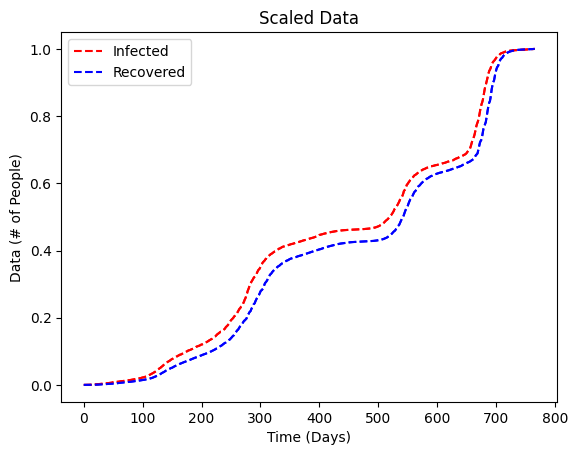

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.2540764639999997


In [4]:
start =process_time()
tt, II, RR=data_process(data, scaler, "yes")  #scaled

stop = process_time()
print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

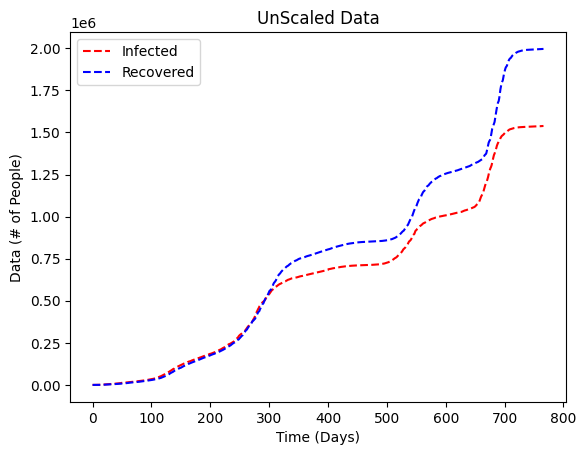

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.5911001430000002


In [5]:
start =process_time()
tt, II, RR=data_process(data, scaler, "no")  #unscaled

stop = process_time()
print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

### Data preprocessing with MPI

In [16]:
%%file script.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    #start = process_time()
    def data_process(data, scaler, cs ="yes"):
        #reverse index
        tdata=data.reindex(index=data.index[::-1])
        #get the infected 
        I=tdata['TOTAL_CONFIRMED']
        #get the recovered
        R =tdata['TOTAL_INACTIVE_RECOVERED']
        #get the length of the data
        nn =len(I)
        # show whether want to scaling
        if cs =="yes": ##indicate yes
            tt=np.linspace(0,nn, nn)
            y1 =np.array(I[:nn]).reshape((-1,1))
            y2 =np.array(R[:nn]).reshape((-1,1))
            #scaling
            II =scaler.fit_transform(y1)
            RR =scaler.fit_transform(y2)
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Scaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig(out + 'scaled_mpi_cuda.png')
            plt.show()
        else:  ##indicate no
            tt=np.linspace(0,nn, nn)
            II =np.array(I[:nn]).reshape((-1,1))
            RR =np.array(R[:nn]).reshape((-1,1))
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('UnScaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig(out + 'scaled_wompi_2_cuda.png')
            plt.show()    
        return tt, II, RR  #scaled
    data =pd.read_csv("tndata.csv")
    scaler =MinMaxScaler()
    tt, II, RR=data_process(data, scaler, "yes")  #scaled
    print("rank0 finished")
#get the start time



Overwriting script.py


In [17]:
start =process_time()

!mpiexec  -np 4 python script.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

Figure(640x480)
rank0 finished
++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.0


In [18]:
%%file script1.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    #start = process_time()
    def data_process(data, scaler, cs ="yes"):
        #reverse index
        tdata=data.reindex(index=data.index[::-1])
        #get the infected 
        I=tdata['TOTAL_CONFIRMED']
        #get the recovered
        R =tdata['TOTAL_INACTIVE_RECOVERED']
        #get the length of the data
        nn =len(I)
        # show whether want to scaling
        if cs =="yes": ##indicate yes
            tt=np.linspace(0,nn, nn)
            y1 =np.array(I[:nn]).reshape((-1,1))
            y2 =np.array(R[:nn]).reshape((-1,1))
            #scaling
            II =scaler.fit_transform(y1)
            RR =scaler.fit_transform(y2)
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Scaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig(out + 'scaled_mpi_cuda.png')
            plt.show()
        else:  ##indicate no
            tt=np.linspace(0,nn, nn)
            II =np.array(I[:nn]).reshape((-1,1))
            RR =np.array(R[:nn]).reshape((-1,1))
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Unscaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig(out + 'scaled_mpi_2_cuda.png')
            plt.show()    
        return tt, II, RR  #scaled
    data =pd.read_csv("tndata.csv")
    scaler =MinMaxScaler()
    tt, II, RR=data_process(data, scaler, "no")  #unscaled
    print("rank0 finished")
#get the start time


Overwriting script1.py


In [19]:
start =process_time()

!mpiexec  -np 4 python script1.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

Figure(640x480)
rank0 finished
++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.0


### Modeling without mpi on CUDA

Tennessee outcomes on CUDA............
LSTM Training
Epoch 100/1500, Total Loss: 1.996e-03, Time:0.59 seconds
Epoch 200/1500, Total Loss: 3.633e-04, Time:0.59 seconds
Epoch 300/1500, Total Loss: 2.416e-04, Time:0.64 seconds
Epoch 400/1500, Total Loss: 1.371e-04, Time:0.55 seconds
Epoch 500/1500, Total Loss: 1.646e-04, Time:0.61 seconds
Epoch 600/1500, Total Loss: 1.090e-04, Time:0.59 seconds
Epoch 700/1500, Total Loss: 7.941e-05, Time:0.63 seconds
Epoch 800/1500, Total Loss: 1.036e-04, Time:0.55 seconds
Epoch 900/1500, Total Loss: 7.143e-05, Time:0.61 seconds
Epoch 1000/1500, Total Loss: 6.444e-05, Time:0.63 seconds
Epoch 1100/1500, Total Loss: 4.731e-05, Time:0.55 seconds
Epoch 1200/1500, Total Loss: 4.429e-05, Time:0.54 seconds
Epoch 1300/1500, Total Loss: 4.520e-05, Time:0.53 seconds
Epoch 1400/1500, Total Loss: 4.589e-05, Time:0.61 seconds
Epoch 1500/1500, Total Loss: 4.782e-05, Time:0.50 seconds
LSTM Total Training Time in seconds 865.0828628540039
Evaluation Time: 0.8200404644012

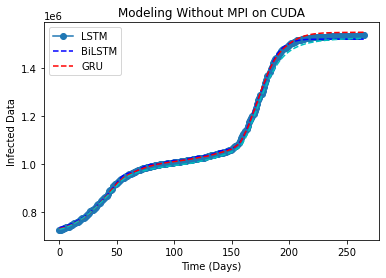

++++++++++++++++++Modeling Infected Data without MPI on CUDA+++++++++++++++++++++++

Time for modeling without MPI on CUDA in seconds: 11106.484375


In [37]:
from rnn_models_cuda import *
#RNN models
start =process_time()
i_true_l, i_pred_l, _, _, _, _,_, i_loss_l_tr=run_model_cuda(II, 'LSTM', 1500, 128, 500, 0.8) 
i_true_b, i_pred_b, _, _, _, _,_, i_loss_b_tr=run_model_cuda(II, 'BiLSTM', 1500, 128, 500, 0.8)
i_true_g, i_pred_g, _, _, _, _,_, i_loss_g_tr=run_model_cuda(II, 'GRU', 1500, 100, 500, 0.8)

x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))

plt.plot(x_t, i_true_l, '-o')
plt.plot(x_t, i_pred_l, '--b')
plt.plot(x_t, i_pred_b, '--r')
plt.plot(x_t, i_pred_g, '--c')
plt.legend(['LSTM', 'BiLSTM', 'GRU'])
plt.title('Modeling Without MPI on CUDA')
plt.xlabel('Time (Days)')
plt.ylabel('Infected Data')
plt.savefig(out+'wompi_cuda.png')
plt.show()

stop = process_time()

print("++++++++++++++++++Modeling Infected Data without MPI on CUDA+++++++++++++++++++++++\n")
print("Time for modeling without MPI on CUDA in seconds:",stop-start) 

### Modeling with MPI on CUDA

In [38]:
%%file script3.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)
from rnn_models_cuda import *
#load the data
data =pd.read_csv("tndata.csv")
# tt, II, RR =data_process(data,scaler, 'no')
scaler =MinMaxScaler()

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')  
        plt.show()
    return tt, II, RR

p=5
comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    tt, II, RR =data_process(data,scaler, 'no')
    i_true_l, i_pred_l, _, _, _, _,ep, i_loss_l=run_model_cuda(II, 'LSTM', 1500, 128, 500, 0.8) 
    i_true_b, i_pred_b, _, _, _, _,_, i_loss_b=run_model_cuda(II, 'BiLSTM', 1500, 128, 500, 0.8)
    i_true_g, i_pred_g, _, _, _, _,_, i_loss_g=run_model_cuda(II, 'GRU', 1500, 100, 500, 0.8)
    x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))
    
    
    plt.plot(x_t, i_true_l, '-o')
    plt.plot(x_t, i_pred_l, '--b')
    plt.plot(x_t, i_pred_b, '--r')
    plt.plot(x_t, i_pred_g, '--c')
    plt.legend(['LSTM', 'BiLSTM', 'GRU'])
    plt.title('Modeling with MPI on CUDA')
    plt.xlabel('Time (Days)')
    plt.ylabel('Infected Data')
    plt.savefig(out+'wmpi_cuda_{}.png'.format(p))
    plt.show()
    print("rank0 finished")

Overwriting script3.py


In [39]:
start =process_time()

!mpiexec  -np 5 python script3.py

stop = process_time()

print("++++++++++++++++++Modeling with MPI on CUDA+++++++++++++++++++++++\n")
print("Tme for modeling of Infected Data on CUDA in seconds:",stop-start) 

Figure(640x480)
Tennessee outcomes on CUDA............
LSTM Training
Epoch 100/1500, Total Loss: 3.137e-03, Time:0.57 seconds
Epoch 200/1500, Total Loss: 3.556e-04, Time:0.70 seconds
Epoch 300/1500, Total Loss: 2.510e-04, Time:0.61 seconds
Epoch 400/1500, Total Loss: 1.964e-04, Time:0.57 seconds
Epoch 500/1500, Total Loss: 1.165e-04, Time:0.55 seconds
Epoch 600/1500, Total Loss: 1.012e-04, Time:0.58 seconds
Epoch 700/1500, Total Loss: 1.686e-04, Time:0.59 seconds
Epoch 800/1500, Total Loss: 9.666e-05, Time:0.57 seconds
Epoch 900/1500, Total Loss: 6.711e-05, Time:0.61 seconds
Epoch 1000/1500, Total Loss: 5.258e-05, Time:0.65 seconds
Epoch 1100/1500, Total Loss: 8.717e-05, Time:0.65 seconds
Epoch 1200/1500, Total Loss: 7.029e-05, Time:0.62 seconds
Epoch 1300/1500, Total Loss: 4.363e-05, Time:0.52 seconds
Epoch 1400/1500, Total Loss: 3.842e-05, Time:0.60 seconds
Epoch 1500/1500, Total Loss: 5.762e-05, Time:0.52 seconds
LSTM Total Training Time in seconds 892.5409486293793
Evaluation Time:

In [34]:
print("++++++++++++++++++Modeling with MPI on CUDA+++++++++++++++++++++++\n")
print("Tme for modeling of Infected Data on CUDA in seconds:",stop-start)

++++++++++++++++++Modeling with MPI on CUDA+++++++++++++++++++++++

Tme for modeling of Infected Data on CUDA in seconds: 1.9375


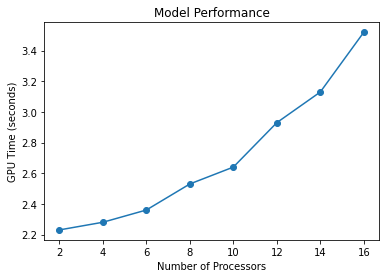

In [30]:
##plot
xx =np.array([2, 4, 6, 8, 10, 12, 14, 16])
yy =np.array([2.23, 2.28, 2.36, 2.53, 2.64, 2.93, 3.13, 3.52])
plt.plot(xx, yy, '-o')
plt.xlabel('Number of Processors')
plt.ylabel('GPU Time (seconds)')
plt.title('Model Performance')
plt.savefig(out + 'gpu_time.png')
plt.show()